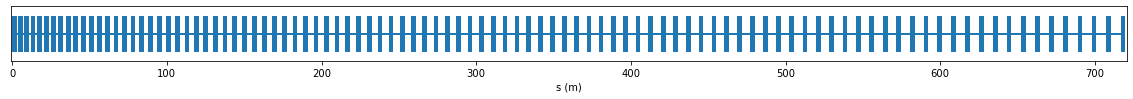

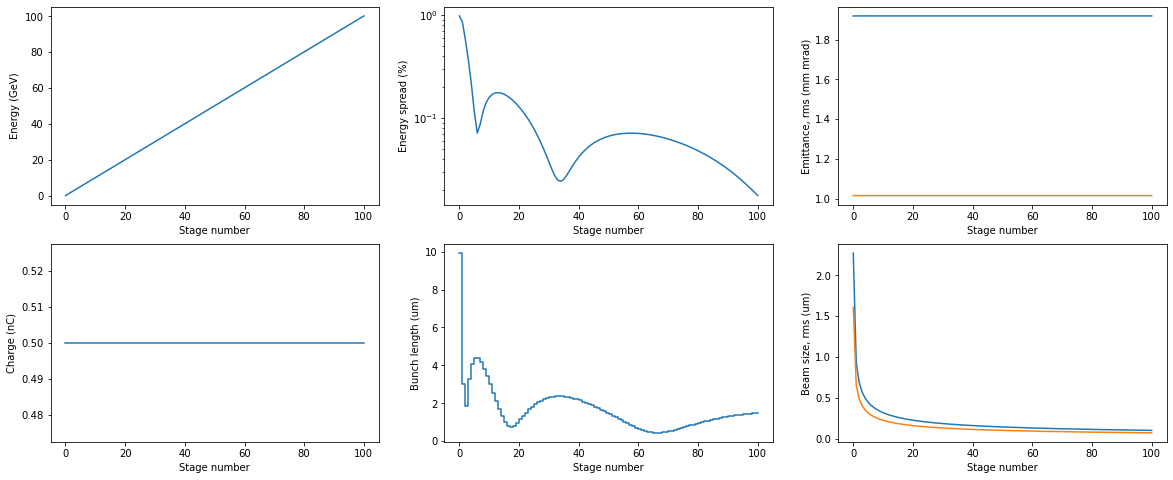

In [4]:
import sys
sys.path.append('../')

from opal import SourceBasic, StageBasic, InterstageBasic, Linac
import numpy as np

# define beam
source = SourceBasic()
source.L = 0.1 # [m]
source.Q = 0.5e-9 # [C]
source.E = 0.2e9 # [eV]
source.sigE = 0.01*source.E # [eV]
source.sigz = 10e-6 # [m]
source.emitnx = 2e-6 # [m rad]
source.emitny = 1e-6 # [m rad]
source.betax = 1e-3 # [m]
source.betay = source.betax

# define stage
stage = StageBasic()
stage.L = 3 # [m]
stage.deltaE = 1e9 # [eV]
stage.chirp = 1e12 # [ev/m]

# define interstage
interstage = InterstageBasic()
interstage.R56 = lambda E: 3e-4 * np.sqrt(10e9/E) # [m(eV)]
interstage.L = lambda E: 2 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = Linac(source = source, stage = stage, interstage = interstage, Nstages = 100)

# track particles
linac.track()

# plot survery and beam evolution
linac.plotSurvey()
linac.plotBeamEvolution()